In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Basic Operation 

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a=np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [7]:
add_op=a+b

In [8]:
mul_op=a*b

In [12]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:20})
    print(add_result)
    
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:np.random.randint(1,10)})
    print(mul_result)

[[  71.63986206   77.0667572    22.84742355   37.15216827   88.5276947 ]
 [ 103.38968658   50.69662476  109.36130524   92.15438843   38.99389648]
 [  75.42276001   55.2131958    38.1892395    98.56017303  116.54832458]
 [  43.23536682   28.35614395   80.35484314   92.89927673   47.62388229]
 [  88.53063202   71.78674316   24.84845352   33.78692245   38.69674301]]
[[ 206.55944824  228.26702881   11.3896904    68.60866547  274.11077881]
 [ 333.55874634  122.78649139  357.44522095  288.61755371   75.97557831]
 [ 221.69104004  140.8527832    72.75695801  314.24069214  386.19329834]
 [  92.94146729   33.42457199  241.41937256  291.59710693  110.49552917]
 [ 274.12252808  207.14698792   19.39381409   55.14769363   74.78697205]]


# Simple Neural Network

In [13]:
n_features = 10
n_dense_neurons = 3

In [14]:
x = tf.placeholder(tf.float32,(None,n_features))

In [15]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [16]:
xW = tf.matmul(x,W)

In [17]:
z = tf.add(xW,b)

In [18]:
a = tf.sigmoid(z)

In [19]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict={x:np.random.random([1,n_features])})
    
    print(layer_out)

[[ 0.84737992  0.67161548  0.91039759]]


# Simple Regression Example

In [23]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [24]:
x_data

array([ -0.87065678,  -0.36102045,   2.04356981,   3.68501726,
         4.57866921,   5.30500722,   7.35562583,   6.69199464,
        10.06929092,   9.21102814])

In [27]:
y_lable = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [29]:
y_lable

array([ -1.31649383,   1.69302092,   2.56276433,   3.32623617,
         4.59818189,   6.55491434,   7.15954174,   7.133153  ,
         8.7645077 ,  10.96741357])

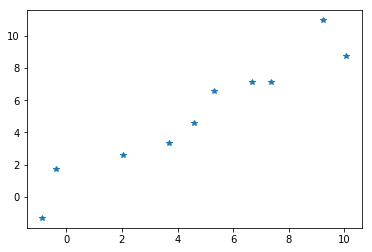

In [34]:
plt.plot(x_data,y_lable,'*')

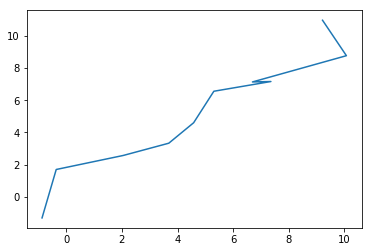

In [35]:
plt.plot(x_data,y_lable)

In [36]:
np.random.rand(2)

array([ 0.77247832,  0.50879   ])

In [45]:
m = tf.Variable(0.77)
b = tf.Variable(0.5)

In [39]:
error = 0

In [46]:
for x,y in zip(x_data,y_lable):
    y_hat = m*x +b
    error += (y-y_hat)**2

In [48]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [49]:
train = optimizer.minimize(error)

In [51]:
init = tf.global_variables_initializer()

In [58]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 1000
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_b =sess.run([m,b])

In [59]:
x_test = np.linspace(-1,11,10)

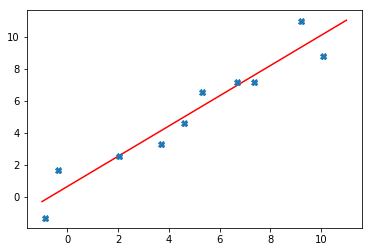

In [60]:
y_pred =final_slope*x_test + final_b
plt.plot(x_test,y_pred,'r')
plt.plot(x_data,y_lable,'X')